In [1]:
import pandas as pd

csv_input = pd.read_csv('files/trajectory_roadId.csv')
#data = csv_input[list(('x', 'y', 'segment'))]
data = csv_input

In [ ]:
#data = data.head(28)
#data

In [2]:
segment_counts = data['segment'].value_counts()
segment_counts

segment
segment14      73343
segment34      42570
segment37      31134
segment29      29617
segment6       26372
               ...  
segment2232        2
segment2231        2
segment967         1
segment1420        1
segment1291        1
Name: count, Length: 246, dtype: int64

In [3]:
segment_counts['segment14']

73343

In [4]:
# Transform segment to Integer
# Identify unique values in the 'Segment' column
unique_segments = data['segment'].unique()


In [5]:
# Create a mapping of unique values to integers
segment_mapping = {segment: i+1 for i, segment in enumerate(unique_segments)}

In [6]:
# Replace values in the 'Segment' column using the mapping
data['segment'] = data['segment'].replace(segment_mapping)

In [7]:
segment_counts = data['segment'].value_counts()
segment_counts

segment
134    73343
64     42570
68     31134
50     29617
105    26372
       ...  
236        2
192        2
235        1
246        1
244        1
Name: count, Length: 246, dtype: int64

In [8]:
segmentType_counts = data['segType'].value_counts()
segmentType_counts

segType
road            627806
intersection     77863
unknown            320
Name: count, dtype: int64

In [9]:
# Remove all rows with 'unknown' values in clumn 'segType'
data=data[data['segType'] != 'unknown']

In [10]:
segmentType_counts = data['segType'].value_counts()
segmentType_counts

segType
road            627806
intersection     77863
Name: count, dtype: int64

In [11]:
# Transform segType to Integer
# Identify unique values in the 'Segment' column
unique_segTypes = data['segType'].unique()

In [12]:
# Create a mapping of unique values to integers
segType_mapping = {segType: i+1 for i, segType in enumerate(unique_segTypes)}

In [13]:
# Replace values in the 'Segment' column using the mapping
data['segType'] = data['segType'].replace(segType_mapping)

/tmp/ipykernel_3344279/2903646301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['segType'] = data['segType'].replace(segType_mapping)


In [14]:
segmentType_counts = data['segType'].value_counts()
segmentType_counts

segType
1    627806
2     77863
Name: count, dtype: int64

In [15]:
data.to_csv('files/trajectory_rid.csv', index=False)

In [22]:
data1 = data[list(('x', 'y', 'segment'))]

In [26]:
filtered_df = data1[data1['segment'] == 2]

In [27]:
observed = filtered_df.to_numpy()
observed

array([[-127.49691772,  -75.94731903,    2.        ],
       [-127.49614716,  -76.34159851,    2.        ],
       [-127.49546814,  -76.717659  ,    2.        ],
       ...,
       [-126.84449768,  -84.33794403,    2.        ],
       [-126.39308929,  -83.70122528,    2.        ],
       [-125.96273041,  -83.01896667,    2.        ]])

In [20]:
import matplotlib.pyplot as plt
#If you want to do it in town11 use:
#center = (390, 700)
#x_scale = 1/25
#y_scale = -1/25

def calculatePosition(x,y):
    center = (390, 330)
    #center = (390, 700)
    x_scale = 1.25
    y_scale = -1.25
    return ((x*x_scale+center[0]), (y*y_scale+center[1]))

def plot_pred(observed, future, predicted):
    #img = plt.imread("assets/Town05_0.5sqk.jpg")

    img = plt.imread("assets/Town11_400sqk.png")

    fig, ax = plt.subplots()
    ax.imshow(img)

    xs = []
    ys = []
    fxs = []
    fys = []
    pxs = []
    pys = []
    
    for v in observed:
        (x,y) = calculatePosition(v[0], v[1])
        xs.append(x)
        ys.append(y)

    for v in future[:len(predicted)]:
        (x,y) = calculatePosition(v[0], v[1])
        fxs.append(x)
        fys.append(y)
    
    for v in predicted:
        (x,y) = calculatePosition(v[0], v[1])
        pxs.append(x)
        pys.append(y)

    plt.scatter(fxs, fys, color="orange", zorder=1)
    plt.scatter(pxs, pys, color="red", zorder=3)
    plt.scatter(xs, ys, color="blue", zorder=2)
    plt.legend(['ActualFuture', 'PredictedFuture', 'Input'])
    plt.show()

def plot(observed):
    img = plt.imread("assets/Town05_0.5sqk.jpg")

    #img = plt.imread("assets/Town11_400sqk.png")

    fig, ax = plt.subplots()
    ax.imshow(img)

    xs = []
    ys = []
    
    for v in observed:
        (x,y) = calculatePosition(v[0], v[1])
        xs.append(x)
        ys.append(y)
    
    marker_on = [xs[0], xs[len(xs)-1]]

    plt.scatter(xs, ys, color="blue", zorder=2)
    plt.legend(['ActualFuture'])
    plt.show()

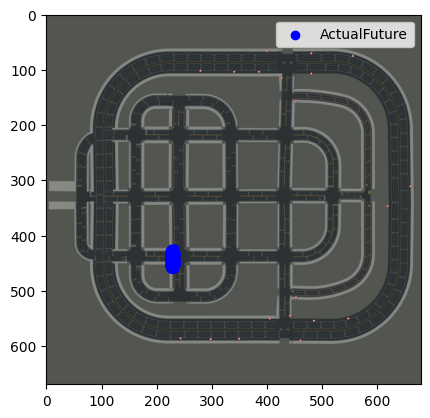

In [28]:
plot(observed=observed)

In [ ]:
size = 10000000

for item in range(0, 162):
    csv_input = pd.read_csv('files/data_07mars2024/random_'+str(item)+'.csv')
    data = csv_input[list(('x', 'y'))]
    if size > len(data):
        size = len(data)

size